# Setting

In [1]:
import numpy as np
import pandas as pd
import datetime as dt

In [2]:
cc ='cc.csv'
demographics = 'demographics.csv'
kplus = 'kplus.csv'
train = 'train.csv'
test = 'test.csv'

In [3]:
cc_data = pd.read_csv(cc, encoding ='UTF-8')
demographics_data =  pd.read_csv(demographics, encoding ='UTF-8')
kplus_data = pd.read_csv(kplus,encoding ='UTF-8')
train_data = pd.read_csv(train,encoding='UTF-8')
test_data = pd.read_csv(test,encoding='UTF-8')

In [4]:
# a function which prepare to use
def percentile(n,s):
    def percentile_(x):
        return np.percentile(x, n)
    percentile_.__name__ =  str(s) +'_percentile_' + str(n)
    return percentile_

In [5]:
 def smape(A, F):
    return (100 - (100/len(A) * np.sum(np.sqrt(np.abs(F - A)) / np.sqrt(np.minimum(2*np.abs(A),np.abs(F)) + np.abs(F)))))

# Feature engineering

## train.csv, test.csv

In [6]:
#cast type on train, test
train_data['id'] = train_data['id'].astype('str')
test_data['id'] = test_data['id'].astype('str')

## demographics.csv

In [7]:
#cast type on demographics_data
demographics_data['id'] = demographics_data['id'].astype('str')
demographics_data['cc_no'] = demographics_data['cc_no'].astype('str')
#onehot encoder __gender 
dfDummies = pd.get_dummies(demographics_data['gender'], prefix = 'category_gender')
demographics_data = pd.concat([demographics_data, dfDummies], axis=1)
#onehot encoder __ocp_cd
dfDummies = pd.get_dummies(demographics_data['ocp_cd'], prefix = 'category_ocp_cd')
demographics_data = pd.concat([demographics_data, dfDummies], axis=1)

demographics_data.drop(columns=['gender', 'ocp_cd'], inplace = True)
demographics_data.head()

,id,cc_no,age,category_gender_1,category_gender_2,category_ocp_cd_1.0,category_ocp_cd_2.0,category_ocp_cd_3.0,category_ocp_cd_4.0,category_ocp_cd_5.0,category_ocp_cd_6.0,category_ocp_cd_7.0,category_ocp_cd_8.0,category_ocp_cd_9.0,category_ocp_cd_11.0,category_ocp_cd_12.0,category_ocp_cd_13.0
0,1,1,5,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1,1,98397,5,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,2,2,4,0,1,0,0,1,0,0,0,0,0,0,0,0,0
3,2,9740,4,0,1,0,0,1,0,0,0,0,0,0,0,0,0
4,3,3,3,0,1,1,0,0,0,0,0,0,0,0,0,0,0


In [8]:
demographics_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102409 entries, 0 to 102408
Data columns (total 17 columns):
id                      102409 non-null object
cc_no                   102409 non-null object
age                     102409 non-null int64
category_gender_1       102409 non-null uint8
category_gender_2       102409 non-null uint8
category_ocp_cd_1.0     102409 non-null uint8
category_ocp_cd_2.0     102409 non-null uint8
category_ocp_cd_3.0     102409 non-null uint8
category_ocp_cd_4.0     102409 non-null uint8
category_ocp_cd_5.0     102409 non-null uint8
category_ocp_cd_6.0     102409 non-null uint8
category_ocp_cd_7.0     102409 non-null uint8
category_ocp_cd_8.0     102409 non-null uint8
category_ocp_cd_9.0     102409 non-null uint8
category_ocp_cd_11.0    102409 non-null uint8
category_ocp_cd_12.0    102409 non-null uint8
category_ocp_cd_13.0    102409 non-null uint8
dtypes: int64(1), object(2), uint8(14)
memory usage: 3.7+ MB


In [9]:
demographics_feature = demographics_data.drop(columns=['cc_no']).drop_duplicates()

## cc.csv

In [10]:
#cast type on cc_data
cc_data['cc_no'] = cc_data['cc_no'].astype('str')

In [11]:
cc_data = demographics_data[['id','cc_no']].merge(cc_data,  left_on=['cc_no'], right_on=['cc_no'], how='left')

In [12]:
cc_data = cc_data.fillna(0)

In [13]:
s='cc_txn_amt'
cc_data_feature = cc_data.groupby(['id']).cc_txn_amt.agg([np.size,np.mean,np.std,np.min,percentile(10,s),percentile(20,s),percentile(30,s),percentile(40,s),percentile(50,s),percentile(60,s),percentile(70,s),percentile(80,s), percentile(90,s), np.max]).rename(columns={'size':'cc_txn_amt_size','amin':'cc_txn_amt_min','amax':'cc_txn_amt_max','mean':'cc_txn_amt_mean','std':'cc_txn_amt_std'})
cc_data_feature = cc_data_feature.fillna(0)

In [14]:
cc_data_feature.reset_index(inplace = True)

## kplus.csv

In [15]:
#cast type on cc_data
kplus_data['id'] = kplus_data['id'].astype('str')
kplus_data['sunday']= pd.to_datetime(kplus_data['sunday']) 

In [16]:
#build feature from kp_txn_count
s='kp_txn_count'
kp_txn_count = kplus_data.groupby(['id']).kp_txn_count.agg([np.size,np.mean,np.std,np.min,percentile(10,s),percentile(20,s),percentile(30,s),percentile(40,s),percentile(50,s),percentile(60,s),percentile(70,s),percentile(80,s), percentile(90,s), np.max]).rename(columns={'size':'kp_txn_count_size','amin':'kp_txn_count_min','amax':'kp_txn_count_max','mean':'kp_txn_count_mean','std':'kp_txn_count_std'})

In [17]:
#buid feature from kp_txn_amt
s='kp_txn_amt'
kp_txn_amt = kplus_data.groupby(['id']).kp_txn_amt.agg([np.size,np.mean,np.std,np.min,percentile(10,s),percentile(20,s),percentile(30,s),percentile(40,s),percentile(50,s),percentile(60,s),percentile(70,s),percentile(80,s), percentile(90,s), np.max]).rename(columns={'size':'kp_txn_amt_size','amin':'kp_txn_amt_min','amax':'kp_txn_amt_max','mean':'kp_txn_amt_mean','std':'kp_txn_amt_std'})

In [18]:
kp_txn_count.reset_index(inplace = True)
kp_txn_amt.reset_index(inplace = True)

In [19]:
kplus_data_feature = kp_txn_count.merge(kp_txn_amt, left_on=['id'], right_on=['id'])

In [20]:
kplus_data_feature.head()

,id,kp_txn_count_size,kp_txn_count_mean,kp_txn_count_std,kp_txn_count_min,kp_txn_count_percentile_10,kp_txn_count_percentile_20,kp_txn_count_percentile_30,kp_txn_count_percentile_40,kp_txn_count_percentile_50,...,kp_txn_amt_percentile_10,kp_txn_amt_percentile_20,kp_txn_amt_percentile_30,kp_txn_amt_percentile_40,kp_txn_amt_percentile_50,kp_txn_amt_percentile_60,kp_txn_amt_percentile_70,kp_txn_amt_percentile_80,kp_txn_amt_percentile_90,kp_txn_amt_max
0,1,2,1.000,0.000000,1,1.0,1.0,1.0,1.0,1.0,...,1550,1600,1650.0,1700,1750,1800.0,1850.0,1900,1950.0,2000
1,10,20,2.150,1.089423,1,1.0,1.0,1.0,1.6,2.0,...,100,500,500.0,600,750,1400.0,2560.0,3620,8190.0,30000
2,100,25,9.640,4.142061,2,4.8,7.0,7.2,8.0,9.0,...,7140,16500,22080.0,26080,35000,38900.0,39940.0,53580,88720.0,102400
3,1000,16,3.375,2.305790,1,1.0,1.0,1.5,2.0,3.0,...,2950,3200,4300.0,5000,5900,8100.0,9150.0,12300,13250.0,14500
4,10000,12,1.500,0.904534,1,1.0,1.0,1.0,1.0,1.0,...,110,200,290.0,500,500,500.0,1060.0,1940,2460.0,3000


# Merge training set

In [21]:
dataset = demographics_feature.merge(kplus_data_feature, left_on=['id'], right_on=['id'], how='left')

In [22]:
dataset = dataset.merge(cc_data_feature, left_on=['id'], right_on=['id'], how='left')

In [23]:
base_set = dataset.fillna(0)
training_set = base_set

In [24]:
training_set_with_label = training_set.merge(train_data,  left_on=['id'], right_on=['id'])

# Train model

In [25]:
X = training_set_with_label.drop(columns=['id', 'income'])
Y = training_set_with_label['income']

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [54]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import MaxAbsScaler


exported_pipeline=  make_pipeline(
    MaxAbsScaler(),
    GradientBoostingRegressor(alpha=0.85, learning_rate=0.1, loss="lad", max_depth=6, max_features=0.85, min_samples_leaf=25, min_samples_split=15, n_estimators=1000, subsample=0.7)
)

exported_pipeline.fit(X_train, Y_train)

Pipeline(memory=None,
     steps=[('maxabsscaler', MaxAbsScaler(copy=True)), ('gradientboostingregressor', GradientBoostingRegressor(alpha=0.85, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='lad', max_depth=30,
             max_features=0.8500000000000001, max_leaf_nodes=None,
             min_imp...0.7000000000000001, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False))])

In [55]:
from sklearn.metrics import mean_absolute_error
Y_predict_train = exported_pipeline.predict(X_train)
Y_predict_test = exported_pipeline.predict(X_test)

print('Train::MAE',mean_absolute_error(Y_train, Y_predict_train, multioutput='raw_values'))
print('Test::MAE',mean_absolute_error(Y_test, Y_predict_test, multioutput='raw_values'))

Train::MAE [10840.98487934]
Test::MAE [23148.03101759]


In [56]:
print('Train::SMAPE',smape(Y_train, Y_predict_train))
print('Test::SMAPE',smape(Y_test, Y_predict_test))

Train::SMAPE 79.93687841365522
Test::SMAPE 54.91997316589099


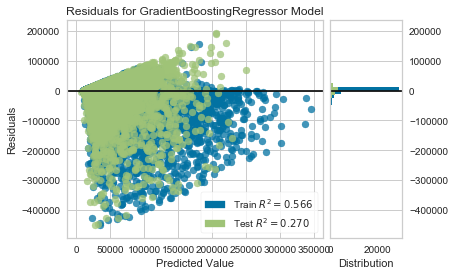

In [57]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(exported_pipeline)

visualizer.fit(X_train, Y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, Y_test)  # Evaluate the model on the test data
visualizer.show()     

# Predict income

In [58]:
test_set_for_send = test_data.merge(base_set,  left_on=['id'], right_on=['id'])

In [59]:
test_set_for_send.set_index(['id'], inplace=True)

In [60]:
results = exported_pipeline.predict(test_set_for_send)

In [61]:
test_set_for_send['income'] = results

In [62]:
test_set_for_send.reset_index(inplace=True)

In [63]:
send_predict = test_set_for_send[['id','income']]

In [64]:
send_predict.to_csv('O_165.csv',index=False)